# ALGORITHM
* Calculate for crirtical properties of plus fraction
* Calculate for all parameters used in the Sutton's method
* Adjust critical properties
* Calculate for pseudo reduced temperature and pressure
* Find z
* Calculate for density

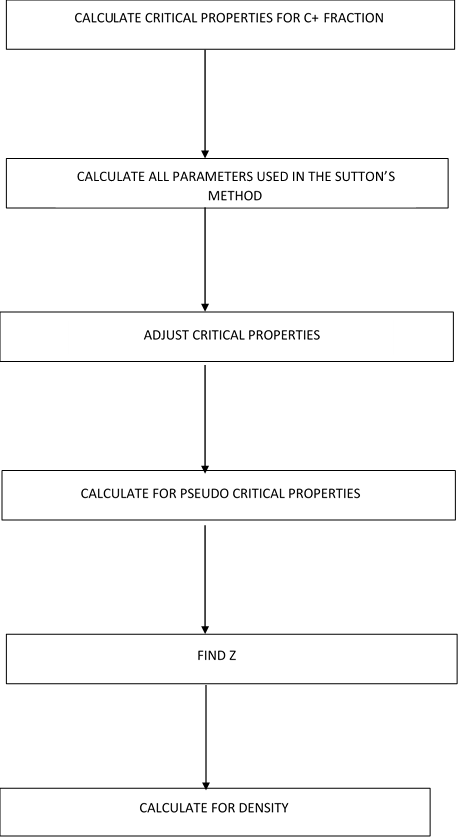

In [2]:
import numpy as np
M_Cplus=161
SG_plus=0.81
RT=150+460
RP=2000
def C_plus_properties(a,M,b,y,c,d,e,f):
    return a*(M**b)*(y**c)*np.exp((d*M)+(e*y)+(f*M*y))
TC_Cplus=C_plus_properties(544.4,161,0.2998,0.81,1.0555,-1.3478*10**-4,-0.61641,0)

PC_Cplus=C_plus_properties(4.5203*10**4,161,-0.8063,0.81,1.6015,-1.8078*10**-3,-0.3084,0)

mole_fractions=np.array([0.83,0.06,0.03,0.02,0.02,0.01,0.03])

Molar_masses=np.array([16,30.1,44.1,58.1,72.2,84.0,161])

TCs=np.array([343.33,549.92,666.06,765.62,845.60,923.00,TC_Cplus])

PCs=np.array([666.06,705.5,616.4,550.6,488.6,483.0,PC_Cplus])

A=sum(mole_fractions*(TCs/PCs))

B=sum(mole_fractions*((TCs/PCs)**0.5))

C=sum(mole_fractions*(TCs)/(PCs**0.5))

#CALCULATING FOR J,K AND OTHER CORRECTED PARAMETERS
def J(A,B):
    return (1/3*(A))+(2/3*(B**2))
J=J(A,B)

K=C
#CALCULATING FOR CORRECTED PARAMETERS
F_j=1/3*(0.03*(TC_Cplus/PC_Cplus)) +2/3*(((0.03*TC_Cplus/PC_Cplus)**0.5)**2)
print(F_j)
E_j=(0.6081*F_j)+(1.1325*F_j**2)-(14.004*F_j*0.03)+(64.434*F_j*(0.03**2))
print(E_j)
E_k=(TC_Cplus/(PC_Cplus**0.5))*((0.3129*0.03)-(4.8156*0.03**2)+(27.3751*0.03**3))

#CALCULATING FOR ADJUSTED PARAMETERS
J_adjust=J-E_j
print(J_adjust)                                                           
K_adjust=K-E_k


#CALCULATING ADJUSTED CRITICAL VALUES 
def PRT(T1,T2):
    return T1/T2
def PRP(P1,P2):
    return P1/P2
                       
TC_adjust=PRT(K_adjust**2,J_adjust)
PC_adjust=PRP(TC_adjust,J_adjust)


##CALCULATING PSEUDO REDUCED PROPERTIES
pseudo_reduced_temperature=PRT(RT,TC_adjust)
pseudo_reduced_pressure=PRP(RP,PC_adjust)

print(pseudo_reduced_temperature)
print(pseudo_reduced_pressure)

#FROM THE GENERALIZED COMPRESSIBILITY CHART;
z=0.78
R=10.730
Ma=sum(mole_fractions*Molar_masses)#Apparent moleculuar mass
print(Ma)
def density(P,Ma,Z,R,T):
    return (P*Ma)/(Z*R*T)
Density_C=density(RP,Ma,z,R,RT) #value when corrected values are used
print(Density_C)


#CALCULATING FOR UNADJUSTED CRITICAL VALUES
def UTC(SPG):
    return 168+(325*SPG)-(12.5*SPG**2)
def UPC(SPG):
    return 677+(15*SPG)-(37.5*SPG**2)
UTC=UTC(0.81) #unadjusted critical temperature
UPC=UPC(0.81)#unadjusted critical pressure

#CALCULATING UNADJUSTED PSEUDO PROPERTIES
UPRT=PRT(RT,UTC)
UPRP=PRP(RP,UPC)
print(UPRT)
print(UPRP)
#from GENERALIZED COMPRESSIBILITY CHART
Z=0.71
Density_U=density(RP,Ma,Z,R,RT)
print(Density_U)

0.11414003689454297
0.04282924449421362
0.6205241137243805
1.381355271892039
2.8103746092764204
24.684999999999995
9.670278183562521
1.441914200195604
3.0095723209633642
10.623685891801083


In [5]:
import numpy as np
M_Cplus=161
SG_plus=0.81
RT=150+460
RP=2000
def C_plus_properties(a,M,b,y,c,d,e,f):
    return a*(M**b)*(y**c)*np.exp((d*M)+(e*y)+(f*M*y))
TC_Cplus=C_plus_properties(544.4,161,0.2998,0.81,1.0555,-1.3478*10**-4,-0.61641,0)

PC_Cplus=C_plus_properties(4.5203*10**4,161,-0.8063,0.81,1.6015,-1.8078*10**-3,-0.3084,0)

mole_fractions=np.array([0.83,0.06,0.03,0.02,0.02,0.01,0.03])

Molar_masses=np.array([16,30.1,44.1,58.1,72.2,84.0,161])

TCs=np.array([343.33,549.92,666.06,765.62,845.60,923.00,TC_Cplus])

PCs=np.array([666.06,705.5,616.4,550.6,488.6,483.0,PC_Cplus])

A=sum(mole_fractions*(TCs/PCs))

B=sum(mole_fractions*((TCs/PCs)**0.5))

C=sum(mole_fractions*(TCs)/(PCs**0.5))

#CALCULATING FOR J,K AND OTHER CORRECTED PARAMETERS
def J(A,B):
    return (1/3*(A))+(2/3*(B**2))
J=J(A,B)
print(J)
K=C
#CALCULATING FOR CORRECTED PARAMETERS
F_j=1/3*(0.03*(TC_Cplus/PC_Cplus)) +2/3*(0.03*((TC_Cplus/PC_Cplus)**0.5))**2
print(F_j)
E_j=(0.6081*F_j)+(1.1325*F_j**2)-(14.004*F_j*0.03)+(64.434*F_j*(0.03**2))
print(E_j)
E_k=(TC_Cplus/(PC_Cplus**0.5))*((0.3129*0.03)-(4.8156*0.03**2)+(27.3751*0.03**3))#last bracket omitted
#CALCULATING FOR ADJUSTED PARAMETERS
J_adjust=J-E_j

K_adjust=K-E_k


#CALCULATING ADJUSTED CRITICAL VALUES 
def PRT(T1,T2):
    return T1/T2
def PRP(P1,P2):
    return P1/P2
                       
TC_adjust=PRT(K_adjust**2,J_adjust)
PC_adjust=PRP(TC_adjust,J_adjust)


##CALCULATING PSEUDO REDUCED PROPERTIES
pseudo_reduced_temperature=PRT(RT,TC_adjust)
pseudo_reduced_pressure=PRP(RP,PC_adjust)


print(pseudo_reduced_temperature)
print(pseudo_reduced_pressure)

#FROM THE GENERALIZED COMPRESSIBILITY CHART;
z=0.745
R=10.730
Ma=sum(mole_fractions*Molar_masses)#Apparent moleculuar mass
print(Ma)
def density(P,Ma,Z,R,T):
    return (P*Ma)/(Z*R*T)
Density_C=density(RP,Ma,z,R,RT) #value when corrected values are used
print(Density_C)


#CALCULATING FOR UNADJUSTED CRITICAL VALUES
def UTC(SPG):
    return 168+(325*SPG)-(12.5*SPG**2)
def UPC(SPG):
    return 677+(15*SPG)-(37.5*SPG**2)
UTC=UTC(0.81) #unadjusted critical temperature
UPC=UPC(0.81)#unadjusted critical pressure

#CALCULATING UNADJUSTED PSEUDO PROPERTIES
UPRT=PRT(RT,UTC)
UPRP=PRP(RP,UPC)
print(UPRT)
print(UPRP)
#from GENERALIZED COMPRESSIBILITY CHART
Z=0.71
Density_U=density(RP,Ma,Z,R,RT)
                        
                                
print(Density_U)

0.6633533582185942
0.040329479702738515
0.011761840121898914
1.4505147483161258
3.0988298586129517
24.684999999999995
10.124586554602374
1.441914200195604
3.0095723209633642
10.623685891801083
